In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit
import math

In [3]:
#random balistic deposition creation
start=timeit.default_timer()
l=200   #lattice size
t=40000 #number of particles(time)
x_new=[]
y_new=[]
h=list(np.zeros(l))
index=list(np.zeros(l))
for j in range(l):
    index[j]=j
for i in range(t):
    k=np.random.randint(l)
    h[k]=h[k]+1
    x_new.append(k)
    y_new.append(h[k])
stop=timeit.default_timer()
print('creation time :',stop-start)    

creation time : 0.12150730000001886


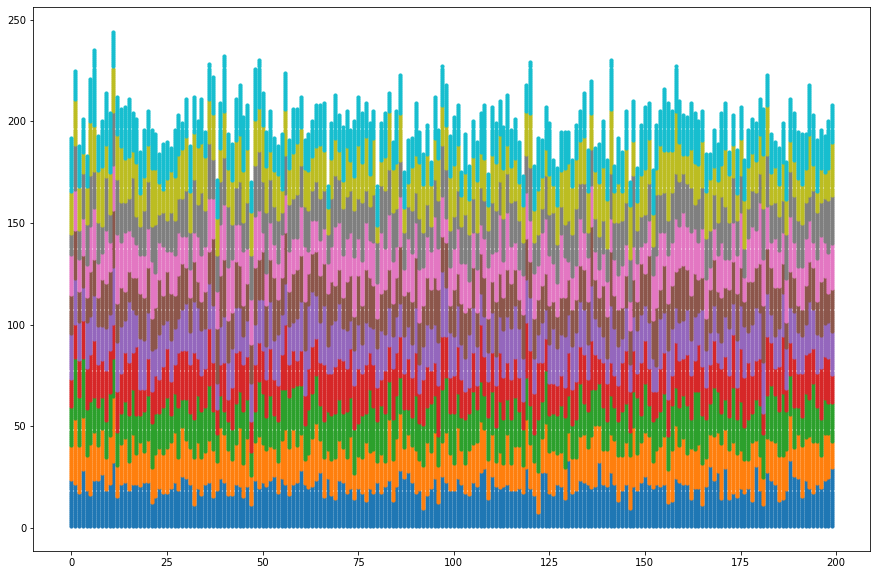

In [4]:
#random balistic deposition show
fig = plt.figure(figsize=(15,10))
colour=10     #number of colours
n=int(t/colour)
for i in range(colour):
    plt.scatter(x_new[i*n:(i+1)*n],y_new[i*n:(i+1)*n],s=10)

In [27]:
#variance calculation for 25 runs and 400,000 particles
start=timeit.default_timer()
l=200
t=400000
run=25
h=np.zeros((run,l))
index=list(np.zeros(l))
variance=[]
tt=[]
h_prime=[]
factor=10**(1/6)
for j in range(run):
    var_count=1000
    for i in range(t):
        k=np.random.randint(l)
        h[j][k]=h[j][k]+1
        if i==var_count:
            if j ==0 :
                tt.append(var_count)
                print(len(tt))
            variance.append(np.sqrt(np.var(h[j][0:l])))
            h_prime.append(np.mean(h[j][0:l]))
            var_count=int(var_count*factor) 
stop=timeit.default_timer()
print('variance calculation time :',stop-start)            

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
variance calculation time : 34.61675360000004


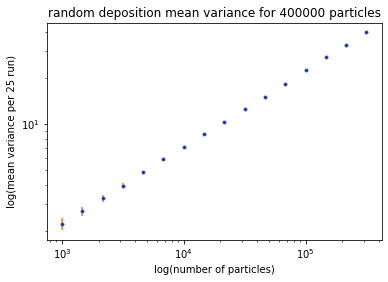

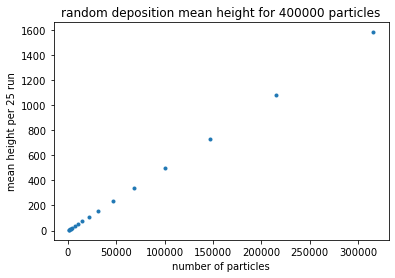

In [28]:
#mean variance and mean height
variance_prime=np.zeros(len(tt))
h_mean=np.zeros(len(tt))
variance_prime2=np.zeros(len(tt))
w=np.zeros(len(tt))
yerr =[]
for j in range(len(tt)):
    for i in range(run):
        variance_prime[j]=variance[int(len(tt)*i+j)]+variance_prime[j]
        variance_prime2[j]=variance[int(len(tt)*i+j)]**2+variance_prime[j]**2
        h_mean[j]=h_prime[int(len(tt)*i+j)]+h_mean[j]
        
variance_prime=variance_prime/run
variance_prime2=variance_prime2/run
w=variance_prime**2
h_mean=h_mean/run
for k in range(len(tt)):
    yerr.append(np.sqrt(variance_prime2[k]-w[k]))
    
for k in range(len(tt)):
    yerr[k]=math.log(yerr[k],10)/(variance_prime[k]* math.log(10))

    
fig,ax=plt.subplots()
ax.set_title('random deposition mean variance for 400000 particles')
ax.set_ylabel('log(mean variance per 25 run)')
ax.set_xlabel('log(number of particles)')
plt.loglog(tt,variance_prime,'.')
ax.errorbar(tt,variance_prime,ls='',yerr=yerr, marker='.',markersize=5,markerfacecolor='blue',markeredgewidth=0.2)
fig,ax=plt.subplots()
ax.set_title('random deposition mean height for 400000 particles')
ax.set_ylabel('mean height per 25 run')
ax.set_xlabel('number of particles')
plt.plot(tt,h_mean,'.')

Beta is 0.5016657742137963


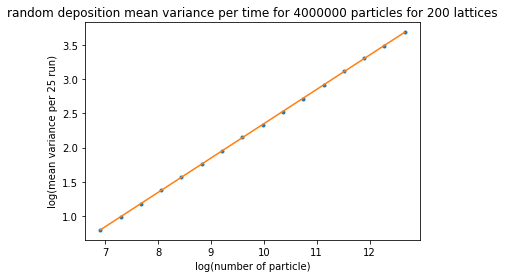

In [33]:
#fit line
x=np.log(tt)
y=np.log(variance_prime)
z=np.polyfit(x,y,1)
print('Beta is',z[0])
x_prime=[np.log(tt)[0],np.log(tt)[len(tt)-1]]
y_prime=[z[0]*np.log(tt)[0]+z[1],z[0]*np.log(tt)[len(tt)-1]+z[1]]
fig,ax=plt.subplots()
ax.set_title('random deposition mean variance per time for 4000000 particles')
ax.set_ylabel('log(mean variance per 25 run)')
ax.set_xlabel('log(number of particle)')
plt.plot(np.log(tt),np.log(variance_prime),'.')
plt.plot(x_prime,y_prime)

In [30]:
#time intervals
tt

[1000,
 1467,
 2153,
 3160,
 4638,
 6807,
 9991,
 14664,
 21523,
 31591,
 46369,
 68060,
 99898,
 146630,
 215223,
 315904]

In [31]:
#mean variance for different time intervals
variance_prime

array([ 2.21778633,  2.67677884,  3.2549221 ,  3.94748926,  4.80549337,
        5.8452072 ,  7.05448781,  8.57373269, 10.34039027, 12.44814319,
       15.07361544, 18.32231883, 22.46745503, 27.47128184, 32.66011595,
       39.69081259])

In [32]:
#mean height for different time intervals
h_mean

array([   5.005,    7.34 ,   10.77 ,   15.805,   23.195,   34.04 ,
         49.96 ,   73.325,  107.62 ,  157.96 ,  231.85 ,  340.305,
        499.495,  733.155, 1076.12 , 1579.525])